In [1]:
#imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostRegressor
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
#Looking at data
img = image.load_img('./train/benign/47.jpg')

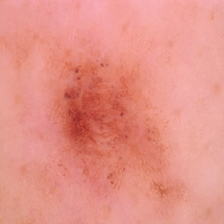

In [3]:
img

In [4]:
#Looking at the max value of the array
cv2.imread('./train/benign/47.jpg').max()

249

In [5]:
#Looking at the shape of the array, 224 by 224 in 3 dimensions
cv2.imread('./train/benign/47.jpg').shape

(224, 224, 3)

In [6]:
#Setting up training and test sets and rescaling
train = ImageDataGenerator(rescale=1/225)
val = ImageDataGenerator(rescale=1/225)

In [7]:
#Looking at image sets
train_set = train.flow_from_directory('./train/',
                                     target_size=(224,224),
                                     batch_size = 1,
                                     class_mode = 'binary')

Found 2541 images belonging to 2 classes.


In [8]:
val_set = train.flow_from_directory('./val/',
                                     target_size=(224,224),
                                     batch_size = 1,
                                     class_mode = 'binary')

Found 96 images belonging to 2 classes.


In [9]:
test_set = train.flow_from_directory('./test/',
                                     target_size=(224,224),
                                     batch_size = 1,
                                     class_mode = 'binary')

Found 660 images belonging to 2 classes.


In [10]:
#our benign class has been converted to 0 and malignant 1
train_set.class_indices

{'benign': 0, 'malignant': 1}

In [11]:
train_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
train_set

In [13]:
len(train_set)

2541

In [14]:
dummy = DummyClassifier()
dummy.fit(train_set, train_set.classes)
dummy.score(test_set, test_set.classes)

0.5454545454545454

In [15]:
X_train = train_set
y_train = train_set.classes

X_test = test_set
y_train = test_set.classes

In [16]:
#Creating cnn model 
model1 = tf.keras.Sequential([tf.keras.layers.Conv2D(50,(3,3), activation='relu', input_shape=(224,224,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Conv2D(75,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Conv2D(100,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             
                             tf.keras.layers.Dense(500, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
                            ])

In [17]:
model1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
#trying first image set
model1_fit = model1.fit(train_set,
                     steps_per_epoch=3,
                     epochs=20,
                     validation_data=test_set)

Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 0.2295 - accuracy: 1.0000 - val_loss: 31.0214 - val_accuracy: 0.5455
Epoch 2/20
3/3 [==============================] - 3s 2s/step - loss: 32.4622 - accuracy: 0.0000e+00 - val_loss: 5.5124 - val_accuracy: 0.4545
Epoch 3/20
3/3 [==============================] - 3s 2s/step - loss: 6.0366 - accuracy: 0.0000e+00 - val_loss: 0.6811 - val_accuracy: 0.5470
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 0.9115 - accuracy: 0.3333 - val_loss: 0.8090 - val_accuracy: 0.5152
Epoch 5/20
3/3 [==============================] - 3s 2s/step - loss: 0.4084 - accuracy: 0.6667 - val_loss: 10.0165 - val_accuracy: 0.5455
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 15.1149 - accuracy: 0.3333 - val_loss: 1.0509 - val_accuracy: 0.4545
Epoch 7/20
3/3 [==============================] - 3s 2s/step - loss: 1.7294 - accuracy: 0.3333 - val_loss: 1.0872 - val_accuracy: 0.4545
Epoch 8/20
3/3 [=============

In [19]:
#finding the best working sets of images able to run
train_set2 = train.flow_from_directory('./train/',
                                     target_size=(224,224),
                                     batch_size = 15,
                                     class_mode = 'binary')

test_set2 = train.flow_from_directory('./test/',
                                     target_size=(224,224),
                                     batch_size = 15,
                                     class_mode = 'binary')

len(train_set), len(test_set)

Found 2541 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


(2541, 660)

In [20]:
#trying second set
model1_fit = model1.fit(train_set2,
                     steps_per_epoch=5,
                     epochs=20,
                     validation_data=test_set2)

Epoch 1/20
5/5 [==============================] - 3s 393ms/step - loss: 0.6970 - accuracy: 0.4533 - val_loss: 0.6933 - val_accuracy: 0.4576
Epoch 2/20
5/5 [==============================] - 2s 364ms/step - loss: 0.6903 - accuracy: 0.5867 - val_loss: 0.6847 - val_accuracy: 0.6500
Epoch 3/20
5/5 [==============================] - 2s 367ms/step - loss: 0.6848 - accuracy: 0.5467 - val_loss: 0.6776 - val_accuracy: 0.5621
Epoch 4/20
5/5 [==============================] - 2s 366ms/step - loss: 0.6710 - accuracy: 0.5867 - val_loss: 0.6653 - val_accuracy: 0.7106
Epoch 5/20
5/5 [==============================] - 2s 364ms/step - loss: 0.6678 - accuracy: 0.6400 - val_loss: 0.6628 - val_accuracy: 0.5485
Epoch 6/20
5/5 [==============================] - 2s 357ms/step - loss: 0.6335 - accuracy: 0.6400 - val_loss: 0.6978 - val_accuracy: 0.5485
Epoch 7/20
5/5 [==============================] - 2s 362ms/step - loss: 0.6237 - accuracy: 0.6667 - val_loss: 0.6575 - val_accuracy: 0.6803
Epoch 8/20
5/5 [====

In [21]:
#trying third set
train_set3 = train.flow_from_directory('./train/',
                                     target_size=(224,224),
                                     batch_size = 30,
                                     class_mode = 'binary')

test_set3 = train.flow_from_directory('./test/',
                                     target_size=(224,224),
                                     batch_size = 30,
                                     class_mode = 'binary')

Found 2541 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [22]:
model1_fit = model1.fit(train_set3,
                     steps_per_epoch=5,
                     epochs=30,
                     validation_data=test_set3)

Epoch 1/30
5/5 [==============================] - 3s 423ms/step - loss: 0.5439 - accuracy: 0.7000 - val_loss: 0.4986 - val_accuracy: 0.7152
Epoch 2/30
5/5 [==============================] - 2s 452ms/step - loss: 0.4600 - accuracy: 0.7733 - val_loss: 0.6317 - val_accuracy: 0.7409
Epoch 3/30
5/5 [==============================] - 2s 457ms/step - loss: 0.5818 - accuracy: 0.7133 - val_loss: 0.5457 - val_accuracy: 0.6788
Epoch 4/30
5/5 [==============================] - 2s 455ms/step - loss: 0.5485 - accuracy: 0.7467 - val_loss: 0.5912 - val_accuracy: 0.7318
Epoch 5/30
5/5 [==============================] - 2s 453ms/step - loss: 0.5783 - accuracy: 0.6867 - val_loss: 0.5517 - val_accuracy: 0.6621
Epoch 6/30
5/5 [==============================] - 2s 440ms/step - loss: 0.5824 - accuracy: 0.7000 - val_loss: 0.4788 - val_accuracy: 0.7258
Epoch 7/30
5/5 [==============================] - 2s 427ms/step - loss: 0.4921 - accuracy: 0.7867 - val_loss: 0.4693 - val_accuracy: 0.7197
Epoch 8/30
5/5 [====

In [23]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=(3,3),
                                  activation='relu',
                                  input_shape=(224,224,3))
          )

model2.add(tf.keras.layers.MaxPool2D(2,2))


model2.add(tf.keras.layers.Conv2D(filters=62,
                                  kernel_size=(3,3),
                                  activation='relu',
                                  input_shape=(224,224,3))
          )

model2.add(tf.keras.layers.MaxPool2D(2,2))


model2.add(tf.keras.layers.Conv2D(filters=128,
                                  kernel_size=(3,3),
                                  activation='relu',
                                  input_shape=(224,224,3))
          )

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
'''model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])'''

In [ ]:
'''model2_fit = model2.fit(train_set3,
                     steps_per_epoch=3,
                     epochs=20,
                     validation_data=test_set3)'''

In [ ]:
'''model2.summary()'''

In [ ]:
'''model2.add(tf.keras.layers.MaxPool2D(2,2))
                             
                             tf.keras.layers.Flatten(),
                             
                             tf.keras.layers.Dense(300, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
                            

model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model2_fit = model2.fit(train_set3,
                     steps_per_epoch=3,
                     epochs=20,
                     validation_data=test_set3)'''

In [ ]:
'''model3 = tf.keras.Sequential([tf.keras.layers.Conv2D(25,(3,3), activation='relu', input_shape=(224,224,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Conv2D(50,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Conv2D(75,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                              
                             tf.keras.layers.Conv2D(100,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                              
                             tf.keras.layers.Conv2D(125,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             
                             tf.keras.layers.Dense(300, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
                            ])

model3.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model3_fit = model3.fit(train_set3,
                     steps_per_epoch=3,
                     epochs=20,
                     validation_data=test_set3)'''

In [ ]:
#the third set worked the best, so now we'll try changing the model

'''model2 = tf.keras.Sequential([tf.keras.layers.Conv2D(60,(3,3), activation='relu', input_shape=(224,224,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Conv2D(120,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Conv2D(240,(3,3), activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             
                             tf.keras.layers.Flatten(),
                             
                             tf.keras.layers.Dense(500, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             
                            ])

model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model2_fit = model2.fit(train_set3,
                     steps_per_epoch=3,
                     epochs=20,
                     validation_data=test_set)'''

In [ ]:
'''model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=(3,3),
                                  activation='relu',
                                  input_shape=(224,224,3)))

model3.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model3.add(tf.keras.layers.Conv2D(filters=64,
                                  kernel_size=(3,3),
                                  activation='relu'))

model3.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

model3.add(tf.keras.layers.Conv2D(filters=128,
                                  kernel_size=(3,3),
                                  activation='relu'))'''

In [ ]:
'''model3.summary()'''

In [24]:
#final model
train_set = train_set3
test_set = test_set3

final_model = model1